# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/train',
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_datagen.flow_from_directory('My_Cars/test',
                                              target_size=(256,256),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


## Model

In [11]:
model = Sequential()

#First Layer
model.add(Conv2D(filters=32, kernel_size=6,padding='same', input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(BatchNormalization())
#model.add(Dropout(0.25))
#Second Layer
model.add(Conv2D(filters=64, kernel_size=6, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(BatchNormalization())
#model.add(Dropout(0.25))
#Third Layer
model.add(Conv2D(filters=128, kernel_size=6, activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
#model.add(Dropout(0.25))
model.add(BatchNormalization())
#Fourth Layer
model.add(Conv2D(filters=64, kernel_size=6,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides = 4))
model.add(Dropout(0.25))

#model.add(GlobalAveragePooling2D())
#Last Layer
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 256, 256, 32)      3488      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 59, 59, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 15, 15, 64)        256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 128)       295040    
__________

### Train

In [13]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 30

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch17.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=256,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=251,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Epoch 1/30
256/256 [==============================] - 246s 962ms/step - loss: 5.5998 - acc: 0.0072 - val_loss: 6.8965 - val_acc: 0.0059

Epoch 00001: val_loss improved from inf to 6.89648, saving model to Saved_Models/weights.best.from_scratch17.hdf5
Epoch 2/30
256/256 [==============================] - 240s 936ms/step - loss: 5.3512 - acc: 0.0116 - val_loss: 5.9944 - val_acc: 0.0099

Epoch 00002: val_loss improved from 6.89648 to 5.99436, saving model to Saved_Models/weights.best.from_scratch17.hdf5
Epoch 3/30
256/256 [==============================] - 240s 939ms/step - loss: 5.2571 - acc: 0.0170 - val_loss: 6.0642 - val_acc: 0.0102

Epoch 00003: val_loss did not improve from 5.99436
Epoch 4/30
256/256 [==============================] - 240s 937ms/step - loss: 5.2083 - acc: 0.0188 - val_loss: 5.2182 - val_acc: 0.0145

Epoch 00004: val_loss improved from 5.99436 to 5.21825, saving model to Saved_Models/weights.best.from_scratch17.hdf5
Epoch 5/30
256/256 [==============================]

In [14]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0,6.896479,0.005852,5.600589,0.007216
1,1,5.994356,0.009864,5.351582,0.011497
2,2,6.064157,0.010238,5.256417,0.017001
3,3,5.218247,0.014484,5.208086,0.018836
4,4,5.251742,0.021476,5.151231,0.022260
5,5,5.159940,0.019478,5.108836,0.022627
6,6,5.159443,0.018105,5.065782,0.025685
7,7,5.105361,0.024847,5.036783,0.028987
8,8,5.409398,0.017980,4.991441,0.030333
9,9,5.601203,0.011362,4.942332,0.035714


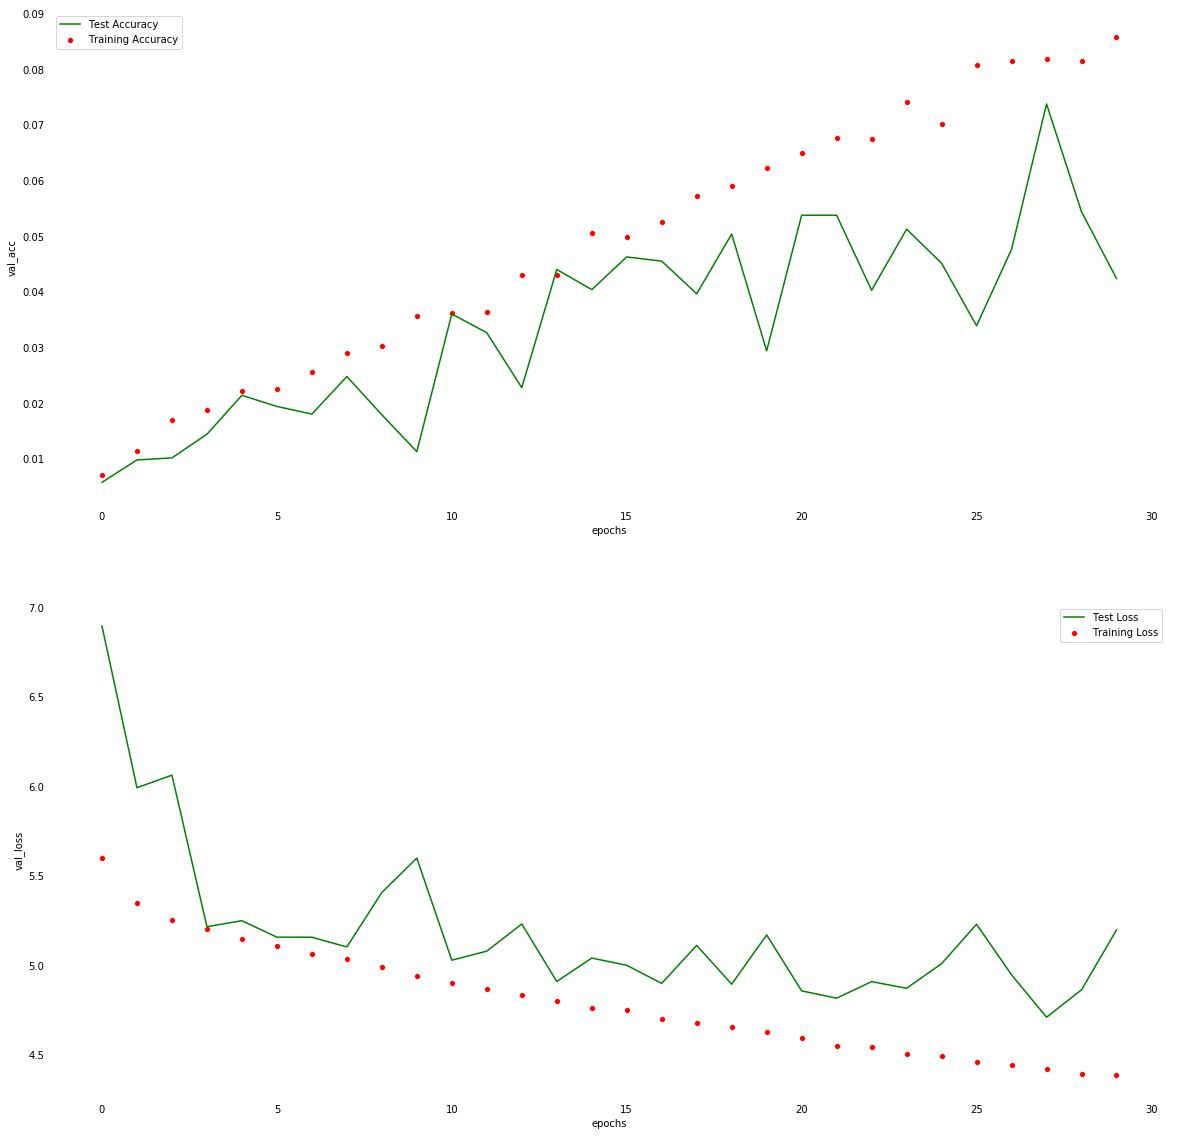

In [15]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters